<a href="https://colab.research.google.com/github/franmarq/SAS-OnDemand-for-Academics---Python/blob/main/sascfg_personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAS® OnDemand for Academics
## Working with Python from Google Colab to SAS ODA
### Follow the instructions in: https://support.sas.com/ondemand/saspy.html
#### Example to use the connection and use: 

https://github.com/sassoftware/saspy-examples/blob/main/SAS_contrib/BasicExampleUsingIrisData.ipynb 

https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3189-2019.pdf

In [ ]:
!pip install saspy

     |████████████████████████████████| 6.4MB 5.2MB/s 
  Created wheel for saspy: filename=saspy-3.7.2-cp37-none-any.whl size=6419248 sha256=5ab8ae207193f6168adda457e3b1312fe90bbeb2e0a09c9427bb26337f14bc78
  Stored in directory: /root/.cache/pip/wheels/97/15/b9/04c61c8b6c0e6b28e8e8772af8b4e4b71312978e9107c3f71b
Successfully built saspy


In [ ]:
import saspy, os
print(saspy.__file__.replace('__init__.py', 'sascfg_personal.py'))

/usr/local/lib/python3.7/dist-packages/saspy/sascfg_personal.py


In [ ]:
saspy

<module 'saspy' from '/usr/local/lib/python3.7/dist-packages/saspy/__init__.py'>

In [ ]:
import saspy
sas_session = saspy.SASsession()
sas_session

Using SAS Config named: oda
Error trying to read authinfo file:/root/.authinfo
[Errno 2] No such file or directory: '/root/.authinfo'
Did not find key oda in authinfo file:/root/.authinfo

Please enter the IOM user id: franmarq@gmail.com
Please enter the password for IOM user : ··········
SAS Connection established. Subprocess id is 279



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /usr/local/lib/python3.7/dist-packages/saspy/sascfg_personal.py
WORK Path             = /saswork/SAS_work31740000F1CD_odaws04-usw2.oda.sas.com/SAS_workEBBE0000F1CD_odaws04-usw2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 3.7.2
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 61901


In [ ]:
import saspy
import pandas as pd

### Example: Create a SAS Data Object named iris that points to sashelp.iris
source: https://github.com/sassoftware/saspy-examples/blob/main/SAS_contrib/BasicExampleUsingIrisData.ipynb

In [ ]:
iris = sas_session.sasdata('iris','sashelp')

Using the head method you can see the first 5 observations


In [ ]:
iris.head()

,Species,SepalLength,SepalWidth,PetalLength,PetalWidth
0,Setosa,50.0,33.0,14.0,2.0
1,Setosa,46.0,34.0,14.0,3.0
2,Setosa,46.0,36.0,10.0,2.0
3,Setosa,51.0,33.0,17.0,5.0
4,Setosa,55.0,35.0,13.0,2.0


In [ ]:
iris.describe()

,Variable,Label,N,NMiss,Median,Mean,StdDev,Min,P25,P50,P75,Max
0,SepalLength,Sepal Length (mm),150.0,0.0,58.0,58.433333,8.280661,43.0,51.0,58.0,64.0,79.0
1,SepalWidth,Sepal Width (mm),150.0,0.0,30.0,30.573333,4.358663,20.0,28.0,30.0,33.0,44.0
2,PetalLength,Petal Length (mm),150.0,0.0,43.5,37.580000,17.652982,10.0,16.0,43.5,51.0,69.0
3,PetalWidth,Petal Width (mm),150.0,0.0,13.0,11.993333,7.622377,1.0,3.0,13.0,18.0,25.0


### Because the result is a pandas dataframe you can manipulate the results using any of the methods for pandas present the results
Let's get the variables in the dataset and put them into a python list

In [ ]:
vlist = iris.info().Variable.tolist()
vlist

['Species', 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

### Now we can use the list of variables in a loop to create histograms for each numeric variable


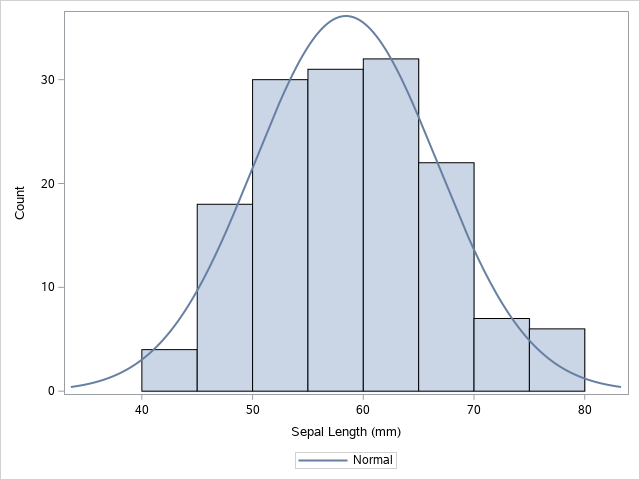


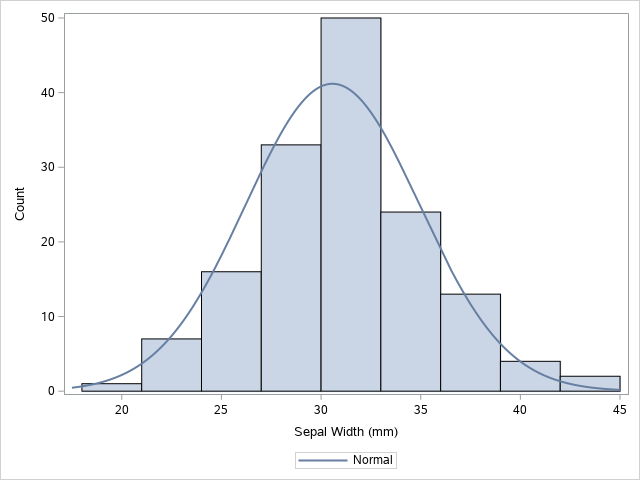


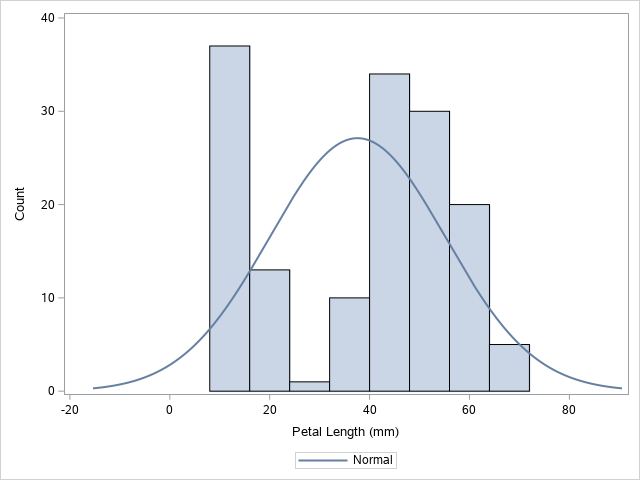


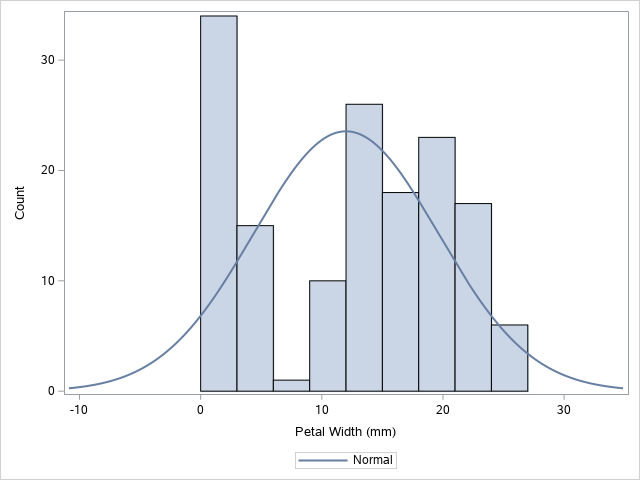

In [ ]:
for i in vlist[1:]:
    iris.hist(i)

The graphics being rendered here are HTML5 objects created in the SAS session. We can use other graphing methods like the heatmap method to create useful plots in just a few key strokes.


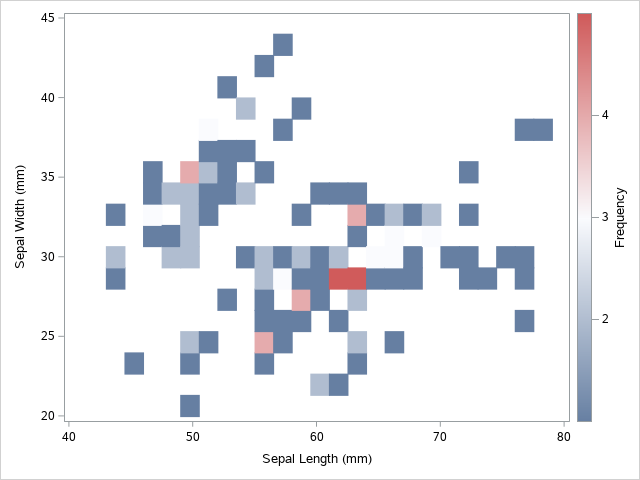

In [ ]:
iris.heatmap('sepallength','sepalwidth')

other examples


In [ ]:
cars = sas_session.sasdata("CARS","SASHELP")
cars.describe()

,Variable,Label,N,NMiss,Median,Mean,StdDev,Min,P25,P50,P75,Max
0,MSRP,NaN,428.0,0.0,27635.0,32774.855140,19431.716674,10280.0,20329.50,27635.0,39215.0,192465.0
1,Invoice,NaN,428.0,0.0,25294.5,30014.700935,17642.117750,9875.0,18851.00,25294.5,35732.5,173560.0
2,EngineSize,Engine Size (L),428.0,0.0,3.0,3.196729,1.108595,1.3,2.35,3.0,3.9,8.3
3,Cylinders,NaN,426.0,2.0,6.0,5.807512,1.558443,3.0,4.00,6.0,6.0,12.0
4,Horsepower,NaN,428.0,0.0,210.0,215.885514,71.836032,73.0,165.00,210.0,255.0,500.0
5,MPG_City,MPG (City),428.0,0.0,19.0,20.060748,5.238218,10.0,17.00,19.0,21.5,60.0
6,MPG_Highway,MPG (Highway),428.0,0.0,26.0,26.843458,5.741201,12.0,24.00,26.0,29.0,66.0
7,Weight,Weight (LBS),428.0,0.0,3474.5,3577.953271,758.983215,1850.0,3103.00,3474.5,3978.5,7190.0
8,Wheelbase,Wheelbase (IN),428.0,0.0,107.0,108.154206,8.311813,89.0,103.00,107.0,112.0,144.0
9,Length,Length (IN),428.0,0.0,187.0,186.362150,14.357991,143.0,178.00,187.0,194.0,238.0


In [ ]:
stat=sas_session.sasstat()

In [ ]:
stat.

In [ ]:
c = sas_session.submit('proc product_status; run;')
print (c['LOG'])


108                                                        The SAS System                        Thursday, June 24, 2021 05:00:00 AM

824        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
824      ! ods graphics on / outputfmt=png;
825        
826        proc product_status; run;
For Base SAS Software ...
   Custom version information: 9.4_M6
   Image version information: 9.04.01M6P110718
For SAS/STAT ...
   Custom version information: 15.1
For SAS/GRAPH ...
   Custom version information: 9.4_M6
For SAS/ETS ...
   Custom version information: 15.1
For SAS/OR ...
   Custom version information: 15.1
   Image version information: 9.04.01M6P050819
For SAS/IML ...
   Custom version information: 15.1
For SAS/QC ...
   Custom version information: 15.1
For SAS/CONNECT ...
   Custom version information: 9.4_M6
For SAS Enterprise Miner ...
   Custom version information: 15.1
For SAS Time Series Workspace Macros ...
   Cu

%%SAS is a convenient way of invoking SAS in the middle of a Python
notebook, and it can also be made available with the command %load_ext saspy.sas_magic

In [ ]:
%load_ext saspy.sas_magic

In [ ]:
%%SAS
proc product_status; 
run;

Using SAS Config named: oda
Error trying to read authinfo file:/root/.authinfo
[Errno 2] No such file or directory: '/root/.authinfo'
Did not find key oda in authinfo file:/root/.authinfo

Please enter the IOM user id: franmarq@gmail.com
Please enter the password for IOM user : ··········
SAS Connection established. Subprocess id is 586



Another code to use

In [ ]:
fish_sds = sas_session.sasdata(table='fish',libref='sashelp')
fish_sds.means()

,Variable,N,NMiss,Median,Mean,StdDev,Min,P25,P50,P75,Max
0,Weight,158.0,1.0,272.5000,398.695570,359.086204,0.0000,120.0000,272.5000,650.0000,1650.000
1,Length1,159.0,0.0,25.2000,26.247170,9.996441,7.5000,19.0000,25.2000,32.7000,59.000
2,Length2,159.0,0.0,27.3000,28.415723,10.716328,8.4000,21.0000,27.3000,36.0000,63.400
3,Length3,159.0,0.0,29.4000,31.227044,11.610246,8.8000,23.1000,29.4000,39.7000,68.000
4,Height,159.0,0.0,7.7860,8.970994,4.286208,1.7284,5.9364,7.7860,12.3778,18.957
5,Width,159.0,0.0,4.2485,4.417486,1.685804,1.0476,3.3756,4.2485,5.5890,8.142


the same example with sas sode

In [ ]:
%%SAS
proc means
 data= sashelp.fish
 stackodsoutput n nmiss median mean std min p25 p50 p75 max
 ;
 run;

Variable,N,N Miss,Median,Mean,Std Dev,Minimum,25th Pctl,50th Pctl,75th Pctl,Maximum
Weight,158,1,272.500000,398.695570,359.086204,0,120.000000,272.500000,650.000000,1650.000000
Length1,159,0,25.200000,26.247170,9.996441,7.500000,19.000000,25.200000,32.700000,59.000000
Length2,159,0,27.300000,28.415723,10.716328,8.400000,21.000000,27.300000,36.000000,63.400000
Length3,159,0,29.400000,31.227044,11.610246,8.800000,23.100000,29.400000,39.700000,68.000000
Height,159,0,7.786000,8.970994,4.286208,1.728400,5.936400,7.786000,12.377800,18.957000
Width,159,0,4.248500,4.417486,1.685804,1.047600,3.375600,4.248500,5.589000,8.142000
